#Introduction to Computer Vision and CNN using TF
# **Convolutional Neural Network (CNN)**
 is a type of deep learning algorithm specifically designed to process structured, grid-like data such as images and videos.

 By using convolutional layers to act as trainable filters, CNNs automatically learn to identify spatial hierarchies of features—from simple edges in early layers to complex, recognizable objects in deeper layers—mimicking the human visual cortex.
##Key Components and Functionality
**Convolutional Layers:** These are the core building blocks. Filters (kernels) slide across the input data (e.g., image pixels) to calculate feature maps, detecting patterns like edges, textures, or shapes.

**Pooling Layers (Downsampling):** These reduce the spatial dimensions of the data (width and height), decreasing computational load and making the detection of features invariant to small changes in location.

**Activation Layer (ReLU):** Introduces non-linearity to the model, allowing the network to learn complex, non-linear patterns.

**Fully Connected Layer:** Located at the end of the network, this layer takes the high-level features extracted by previous layers and uses them to classify the input into different categories.
##Why CNNs are Used
Automatic Feature Extraction: Unlike traditional neural networks, CNNs automatically learn to identify relevant features without manual feature engineering.

Spatial Invariance: CNNs can recognize an object regardless of its position or orientation in an image.

Parameter Sharing: Filters are reused across the entire image, which reduces memory consumption and increases efficiency.
##Common Applications
Image Classification and Recognition: Identifying objects, scenes, or people in photos.

Object Detection and Segmentation: Locating objects within images for applications like autonomous vehicle navigation.

Medical Image Analysis: Detecting diseases in X-rays or MRIs.
Video Analysis: Video tagging and, in some cases, natural language processing.

CNNs are the standard for computer vision tasks and have revolutionized fields that rely on visual data interpretation.

# **Computer vision**
is a field of artificial intelligence (AI) that enables computers to interpret, analyze, and extract meaningful information from digital images, videos, and other visual inputs.

It simulates human vision by using machine learning, deep learning, and algorithms to recognize objects, patterns, and, context in visual data.

##*Key Aspects and Techniques*
Computer vision functions by training models on large datasets to recognize features, similar to putting together a jigsaw puzzle. Key techniques include:

**Image Classification:** Categorizing an entire image (e.g., identifying "dog" or "cat").

**Object Detection:** Locating and identifying multiple objects within an image, such as finding pedestrians and cars in a, self-driving car camera feed.

**Segmentation:** Partitioning an image into different segments for finer, pixel-level analysis.

**Reconstruction & Reorganization:** Creating 3D models from 2D images and understanding the relationships between objects.
#Real-World Applications
Computer vision is used across various industries to automate tasks and improve efficiency:

**Healthcare:** Analyzing medical images like X-rays and MRIs to detect diseases.

**Automotive:** Enabling autonomous vehicles to recognize road signs, traffic lights, and pedestrians.

**Security:** Powering facial recognition systems and monitoring surveillance footage for anomalies.

**Retail:** Facilitating cashier-less checkout systems and inventory tracking.

**Agriculture:** Monitoring crop health and yield optimization via drones.

In [1]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2026-02-02 06:48:35--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.24.207, 172.217.194.207, 142.250.4.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.24.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  22.8MB/s    in 6.1s    

2026-02-02 06:48:41 (17.0 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [2]:
#Unzip the download file
zip_ref=zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

#How is data modified(Preprocessed)
The data is found in kaggle on the url below
https://www.kaggle.com/datasets/dansbecker/food-101

In order to make the data modified for use in a CNN model,the instructions on module https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb
helped in preprocessing the data into desired output.

#Inspecting the data

For a ML model ,its very crucial to inspect the data.....meaning visualize the sample datasets as many as possible.

##Involves but not limited to :

1. Walking through the data directory to find out the number of directories & files/images in each dir

2. Getting the classnames progrmmatically from dataset file/folder

3. Randomly selecting and visualizing images from any data class:It help in visualizing as well as determining the data quality :is any broken,are they clean ,are they correctly sampled etc before entering it into a model

In [3]:
!ls


pizza_steak  pizza_steak.zip  sample_data


In [4]:
!ls pizza_steak

test  train


In [5]:
!ls pizza_steak/train/

pizza  steak


In [6]:
!ls pizza_steak/train/pizza/

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

In [7]:
import os

#Create function to walk through the pizza_steak directory and list the number of files
for dirpath,dirnames,filenames in os.walk('pizza_steak'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}')

There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/pizza
There are 0 directories and 250 images in pizza_steak/test/steak
There are 2 directories and 0 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/pizza
There are 0 directories and 750 images in pizza_steak/train/steak


In [8]:
#Another way to find the number of files/images in a directory
num_steak_images_train=len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

In [9]:
#Get the classnames programaticlly
import os
import pathlib
import numpy as np

data_dir=pathlib.Path("pizza_steak/train")
class_names=np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


In [10]:
#Let's visualize our data randomly
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
  #Set up the target image we'll view imager from
  target_folder=target_dir+target_class

  #Set up to collect random images
  random_img=random.sample(os.listdir(target_folder),1)[0]#Extract the first string/img from the list

  #Read the image in
  img= mpimg.imread(target_folder + '/' + random_img)

  # Plot the image using matplot.lib
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(f'Image shape:{img.shape}')

  return img



Image shape:(512, 512, 3)


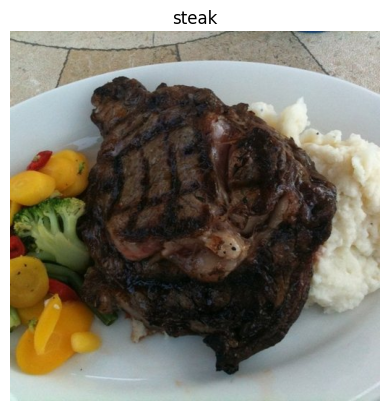

In [11]:
img=view_random_image(target_dir="pizza_steak/train/",
                      target_class='steak')

In [12]:
#The image is seen to be a giant  array/tensor  of numbers of different values
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[174, 176, 154],
        [183, 185, 163],
        [183, 185, 163],
        ...,
        [190, 193, 182],
        [192, 195, 184],
        [190, 193, 182]],

       [[184, 186, 164],
        [181, 183, 161],
        [178, 180, 158],
        ...,
        [198, 201, 190],
        [197, 200, 189],
        [194, 197, 186]],

       [[185, 188, 167],
        [173, 176, 155],
        [167, 170, 149],
        ...,
        [195, 198, 189],
        [189, 192, 183],
        [196, 199, 190]],

       ...,

       [[213, 238, 232],
        [215, 240, 234],
        [217, 242, 236],
        ...,
        [172, 184, 184],
        [170, 182, 182],
        [168, 180, 180]],

       [[213, 238, 232],
        [214, 239, 233],
        [216, 241, 235],
        ...,
        [164, 176, 176],
        [163, 175, 175],
        [163, 175, 175]],

       [[212, 237, 231],
        [213, 238, 232],
        [214, 239, 233],
        ...,
        [159, 171, 17

#Modelling the data
Involves turning the data into numbers (because neural networks can't interpret images)

##Involves but not limited to
1. Turning all data into numbers
2. Make sure all the tensors are of the right shape
3. Scale features(normalize or standardize)

Since its super tedious to normalize each img,TF provides inbuilt mechanisms to allow us to do this


In [13]:
img/255.

array([[[0.68235294, 0.69019608, 0.60392157],
        [0.71764706, 0.7254902 , 0.63921569],
        [0.71764706, 0.7254902 , 0.63921569],
        ...,
        [0.74509804, 0.75686275, 0.71372549],
        [0.75294118, 0.76470588, 0.72156863],
        [0.74509804, 0.75686275, 0.71372549]],

       [[0.72156863, 0.72941176, 0.64313725],
        [0.70980392, 0.71764706, 0.63137255],
        [0.69803922, 0.70588235, 0.61960784],
        ...,
        [0.77647059, 0.78823529, 0.74509804],
        [0.77254902, 0.78431373, 0.74117647],
        [0.76078431, 0.77254902, 0.72941176]],

       [[0.7254902 , 0.7372549 , 0.65490196],
        [0.67843137, 0.69019608, 0.60784314],
        [0.65490196, 0.66666667, 0.58431373],
        ...,
        [0.76470588, 0.77647059, 0.74117647],
        [0.74117647, 0.75294118, 0.71764706],
        [0.76862745, 0.78039216, 0.74509804]],

       ...,

       [[0.83529412, 0.93333333, 0.90980392],
        [0.84313725, 0.94117647, 0.91764706],
        [0.85098039, 0

#Creating an end-end model
We need a way to
1. Load our images
2. Preprocess the images
3. Build a CNN  to find out the patterns
4. Compilr our CNN
5. Fit CNN  to our training data

In [14]:
#Create the model
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Set random seed
tf.random.set_seed(42)

#Preoprocess the data (Get all the values between 1& 0)
train_datagen=ImageDataGenerator(rescale=1./255)
valid_datagen=ImageDataGenerator(rescale=1./255)

#Set up the paths
train_dir='pizza_steak/train'
valid_dir='pizza_steak/test'

#Import images form f=directories and turn them into batches
train_data=train_datagen.flow_from_directory(directory=train_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode='binary',
                                             seed=42)
valid_data=valid_datagen.flow_from_directory(directory=valid_dir,
                                                batch_size=32,
                                                target_size=(224,224),
                                                class_mode='binary',
                                                seed=42)

#Create the model
model_1=tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding='valid'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation='sigmoid')


])

#Compile the model
model_1.compile(loss="binary_crossentropy",
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["accuracy"])

#Fit the  model
history_1=model_1.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 17s 228ms/step - accuracy: 0.6475 - loss: 0.6127 - val_accuracy: 0.8180 - val_loss: 0.4210
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - accuracy: 0.8204 - loss: 0.4238 - val_accuracy: 0.7940 - val_loss: 0.4438
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - accuracy: 0.8397 - loss: 0.4013 - val_accuracy: 0.8120 - val_loss: 0.3827
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 118ms/step - accuracy: 0.8804 - loss: 0.3025 - val_accuracy: 0.8640 - val_loss: 0.3317
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - accuracy: 0.8853 - loss: 0.2905 - val_accuracy: 0.8700 - val_loss: 0.3043


In [15]:
#Getting the model summary
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        28,091 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

#Notes and references
##1.Activation functions

| Activation Function | Formula / Idea (intuition)    | Typical Use Case                                                                          |
| ------------------- | ----------------------------- | ----------------------------------------------------------------------------------------- |
| **Linear**          | (f(x) = x)                    | Output layer for **regression** problems (predicting real values like price, temperature) |
| **Sigmoid**         | Outputs values in **(0, 1)**  | Output layer for **binary classification** (probability of yes/no)                        |
| **Tanh**            | Outputs values in **(−1, 1)** | Hidden layers (older networks); centered data, but less used now                          |
| **ReLU**            | (f(x) = \max(0, x))           | **Default choice** for hidden layers in most deep networks                                |
| **Leaky ReLU**      | Small slope for (x < 0)       | Hidden layers when ReLU “dying neuron” problem appears                                    |
| **ELU**             | Smooth version of ReLU        | Hidden layers when faster convergence is needed                                           |
| **Softmax**         | Outputs sum to **1**          | Output layer for **multi-class classification**                                           |
| **Swish**           | (x \cdot \text{sigmoid}(x))   | Deep networks; often better than ReLU (e.g., modern CNNs)                                 |
| **GELU**            | Probabilistic ReLU            | Transformers (BERT, GPT-style models)                                                     |


##2.Loss functions
| Loss Function                        | What it Measures (intuuition)                                         | Typical Use Case                                |
| ------------------------------------ | --------------------------------------------------------------------- | ----------------------------------------------- |
| **Mean Squared Error (MSE)**         | Average of squared prediction errors (penalizes large errors heavily) | **Regression** problems                         |
| **Mean Absolute Error (MAE)**        | Average of absolute errors (treats all errors equally)                | Regression, **robust to outliers**              |
| **Huber Loss**                       | MSE for small errors, MAE for large ones                              | Regression with **some outliers**               |
| **Binary Cross-Entropy (Log Loss)**  | Difference between predicted probability and true label               | **Binary classification**                       |
| **Categorical Cross-Entropy**        | Distance between predicted class distribution and true class          | **Multi-class classification** (one-hot labels) |
| **Sparse Categorical Cross-Entropy** | Same as above but with integer labels                                 | Multi-class classification (labels not one-hot) |
| **Hinge Loss**                       | Margin-based error                                                    | **SVMs**, margin classifiers                    |
| **Kullback–Leibler (KL) Divergence** | Difference between two probability distributions                      | VAEs, distribution matching                     |
| **Negative Log Likelihood (NLL)**    | Penalizes incorrect probabilistic predictions                         | Classification with probabilistic outputs       |
| **Poisson Loss**                     | Error between predicted and actual count                              | **Count data** (events, arrivals)               |
| **Cosine Similarity Loss**           | Angular difference between vectors                                    | **Embedding / similarity** tasks                |
| **Triplet Loss**                     | Relative distance between samples                                     | Face recognition, metric learning               |


##3.Optimizers
| Optimizer                             | Core Idea (intuition)                         | Typical Use Case                       |
| ------------------------------------- | --------------------------------------------- | -------------------------------------- |
| **Batch Gradient Descent**            | Uses entire dataset to update weights         | Small datasets, theory                 |
| **Stochastic Gradient Descent (SGD)** | Updates weights using one sample at a time    | Large datasets, online learning        |
| **Mini-Batch SGD**                    | Uses small batches for stable + fast learning | **Default baseline optimizer**         |
| **SGD + Momentum**                    | Adds “velocity” to reduce oscillations        | Faster convergence than plain SGD      |
| **Nesterov Momentum**                 | Looks ahead before updating                   | CNNs, smoother convergence             |
| **Adagrad**                           | Larger updates for rare features              | Sparse data (NLP, recommender systems) |
| **Adadelta**                          | Fixes Adagrad’s learning-rate decay           | When tuning learning rate is hard      |
| **RMSProp**                           | Normalizes gradients using moving average     | RNNs, non-stationary problems          |
| **Adam**                              | Momentum + RMSProp combined                   | **Most popular default optimizer**     |
| **AdamW**                             | Adam + proper weight decay                    | Transformers, modern deep learning     |
| **Nadam**                             | Adam + Nesterov momentum                      | Slight improvement over Adam           |
| **L-BFGS**                            | Second-order approximation                    | Small models, convex problems          |


##3.Accuracy
| Metric                        | What it Measures (intuition)                  | Typical Use Case                                        |
| ----------------------------- | --------------------------------------------- | ------------------------------------------------------- |
| **Accuracy**                  | Fraction of correct predictions               | Balanced classification problems                        |
| **Precision**                 | Of predicted positives, how many are correct  | When **false positives are costly** (spam detection)    |
| **Recall (Sensitivity)**      | Of actual positives, how many are found       | When **false negatives are costly** (disease detection) |
| **F1-Score**                  | Harmonic mean of precision & recall           | **Imbalanced datasets**                                 |
| **Confusion Matrix**          | Full breakdown of predictions                 | Model diagnosis & error analysis                        |
| **ROC-AUC**                   | Ability to separate classes across thresholds | Binary classification                                   |
| **PR-AUC**                    | Precision-Recall tradeoff                     | Highly imbalanced datasets                              |
| **Log Loss**                  | Confidence of probability predictions         | Probabilistic classifiers                               |
| **Top-K Accuracy**            | True label in top K predictions               | Image classification                                    |
| **Hamming Loss**              | Fraction of incorrect labels                  | Multi-label classification                              |
| **Mean Squared Error (MSE)**  | Average squared error                         | Regression                                              |
| **Mean Absolute Error (MAE)** | Average absolute error                        | Regression (robust to outliers)                         |
| **RMSE**                      | Square root of MSE                            | Regression (interpretable scale)                        |
| **R² Score**                  | Variance explained by model                   | Regression goodness-of-fit                              |
| **MAPE**                      | Percentage prediction error                   | Forecasting, business metrics                           |
| **BLEU**                      | N-gram overlap score                          | Machine translation                                     |
| **ROUGE**                     | Recall-based text overlap                     | Text summarization                                      |
| **Cosine Similarity**         | Angle between vectors                         | Embeddings, similarity search                           |


##4. Data Augmentation
| Augmentation Feature  | Name (Parameter)                | Function (What it Does)                | Typical Use Cases                 | Common Values            |
| --------------------- | ------------------------------- | -------------------------------------- | --------------------------------- | ------------------------ |
| **Rescaling**         | **`rescale`**                   | Scales pixel values to a smaller range | Normalize image inputs            | `1./255`                 |
| **Rotation**          | **`rotation_range`**            | Randomly rotates images                | Objects with no fixed orientation | `10–40` degrees          |
| **Width Shift**       | **`width_shift_range`**         | Shifts image horizontally              | Object location invariance        | `0.1–0.2`                |
| **Height Shift**      | **`height_shift_range`**        | Shifts image vertically                | Object location invariance        | `0.1–0.2`                |
| **Shear**             | **`shear_range`**               | Applies shear (slant) transformation   | Perspective variation             | `0.1–0.3`                |
| **Zoom**              | **`zoom_range`**                | Random zoom in/out                     | Scale invariance                  | `0.1–0.3`                |
| **Horizontal Flip**   | **`horizontal_flip`**           | Flips image left–right                 | Faces, animals, objects           | `True / False`           |
| Vertical Flip         | `vertical_flip`                 | Flips image top–bottom                 | Aerial / medical images           | `True / False`           |
| **Fill Mode**         | **`fill_mode`**                 | Fills empty pixels after transforms    | Prevents blank regions            | `'nearest'`, `'reflect'` |
| Brightness Adjustment | `brightness_range`              | Randomly changes brightness            | Lighting variation                | `[0.8, 1.2]`             |
| Channel Shift         | `channel_shift_range`           | Shifts RGB channel values              | Color variation robustness        | `10–50`                  |
| Featurewise Centering | `featurewise_center`            | Centers dataset mean to zero           | Dataset normalization             | `True / False`           |
| Samplewise Centering  | `samplewise_center`             | Centers each image mean                | Per-image normalization           | `True / False`           |
| Featurewise Std Norm  | `featurewise_std_normalization` | Scales by dataset std dev              | Standardization                   | `True / False`           |
| Samplewise Std Norm   | `samplewise_std_normalization`  | Scales each image std dev              | Contrast normalization            | `True / False`           |
| ZCA Whitening         | `zca_whitening`                 | Removes pixel correlation              | Research / legacy models          | `True / False`           |


##5.Flow from directory
| Feature                  | Name (Parameter)  | Function (What it Does)          | Use Case                     | Common Values                           |
| ------------------------ | ----------------- | -------------------------------- | ---------------------------- | --------------------------------------- |
| **Dataset Path**         | **`directory`**   | Path to the root image directory | Load image dataset           | `'data/train'`                          |
| **Target Image Size**    | **`target_size`** | Resizes all images to same size  | Match CNN input layer        | `(224,224)`, `(128,128)`                |
| **Batch Size**           | **`batch_size`**  | Number of images per batch       | Memory & training control    | `16`, `32`, `64`                        |
| **Class Mode**           | **`class_mode`**  | Determines label format          | Classification type          | `'binary'`, `'categorical'`, `'sparse'` |
| **Color Mode**           | **`color_mode`**  | Image color channels             | RGB vs grayscale             | `'rgb'`, `'grayscale'`                  |
| **Shuffle Data**         | **`shuffle`**     | Randomizes image order           | Prevents learning order bias | `True`                                  |
| **Interpolation Method** | `interpolation`   | Resizing algorithm               | Image quality control        | `'nearest'`, `'bilinear'`               |
| **Class Names**          | `classes`         | Explicit class folder order      | Control label mapping        | `['cat','dog']`                         |
| **Random Seed**          | `seed`            | Ensures reproducibility          | Debugging / experiments      | `42`                                    |
| Save Augmented Images    | `save_to_dir`     | Saves augmented samples          | Verify augmentation          | Path string                             |
| Save Filename Prefix     | `save_prefix`     | Prefix for saved images          | File naming                  | `'aug_'`                                |
| Save Image Format        | `save_format`     | Output image format              | Storage control              | `'png'`, `'jpeg'`                       |
| Follow Symlinks          | `follow_links`    | Follows symbolic links           | Complex directory setups     | `True / False`                          |


##6.Conv2D layer
| Feature               | Name (Parameter)       | Function (What it Does)                 | Use Case / Effect         | Common Values           |
| --------------------- | ---------------------- | --------------------------------------- | ------------------------- | ----------------------- |
| **Number of Filters** | **`filters`**          | Number of feature maps the layer learns | Controls model capacity   | `16`, `32`, `64`, `128` |
| **Kernel Size**       | **`kernel_size`**      | Size of convolution window              | Captures local patterns   | `(3,3)`, `(5,5)`        |
| **Stride**            | **`strides`**          | Step size of convolution                | Downsampling feature maps | `(1,1)`, `(2,2)`        |
| **Padding**           | **`padding`**          | Handles border pixels                   | Preserve or reduce size   | `'same'`, `'valid'`     |
| **Activation**        | **`activation`**       | Non-linear transformation               | Enables complex patterns  | `'relu'`, `'gelu'`      |
| **Input Shape**       | **`input_shape`**      | Shape of input tensor                   | First layer only          | `(224,224,3)`           |
| Use Bias              | `use_bias`             | Adds bias term                          | Shifts activation         | `True / False`          |
| Kernel Initializer    | `kernel_initializer`   | Initializes filter weights              | Stable training           | `'he_normal'`           |
| Bias Initializer      | `bias_initializer`     | Initializes bias                        | Training stability        | `'zeros'`               |
| Kernel Regularizer    | `kernel_regularizer`   | Penalizes large weights                 | Reduce overfitting        | `l2(0.001)`             |
| Bias Regularizer      | `bias_regularizer`     | Regularizes bias                        | Overfitting control       | `None`                  |
| Activity Regularizer  | `activity_regularizer` | Regularizes outputs                     | Feature sparsity          | `None`                  |
| Dilation Rate         | `dilation_rate`        | Expands receptive field                 | Context capture           | `(1,1)`, `(2,2)`        |
| Data Format           | `data_format`          | Channel ordering                        | Framework compatibility   | `'channels_last'`       |
| Groups                | `groups`               | Splits input channels                   | Depthwise/group conv      | `1`, `in_channels`      |


#Breaking down the steps taken  one by one
1. Loading the data
2. Visualizing the data
3. Preprocessing the data
4. Building our CNN
4. Compiling the model
5. Fitting the model
6.

##1.Visualizing the data


Image shape:(342, 512, 3)
Image shape:(512, 512, 3)


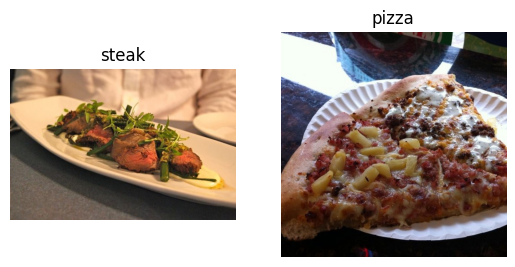

In [16]:
plt.figure()
#The three numbers represent (rows, columns, index):
#1 (Rows): Create a grid with 1 row.
#2 (Columns): Create a grid with 2 columns.
#1 (Index): Put the next plot in the 1st position (the left side).

plt.subplot(1,2,1)
steak=view_random_image('pizza_steak/train/','steak')
plt.subplot(1,2,2)
pizza=view_random_image('pizza_steak/train/','pizza')

##2.loading the data (The concept of batching)
Batching:The process of feeding neural  networks a controlled amount of data /time .

1. Due to Limited memory of the processors
2. Learning patterns in a giant dataset at once leads to poor results

?32
Its the optimum batch size for models

In [17]:
#Set up the directories
train_dir='pizza_steak/train/'
test_dir="pizza_steak/test/"

In [18]:
#Create train and test data & rescale the data
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=(1./255))


**directory**	Path to the target data folder.	Folder must contain subfolders (one per class).

**target_size**	Tuple of (height, width).	All images are resized to this. Default is (256, 256).

**color_mode**	'rgb', 'rgba', or 'grayscale'.	Usually 'rgb'. Determines the number of color channels.

**classes**	Optional list of class names.	e.g., ['pizza', 'steak']. If None, it uses folder names.

**class_mode**	Label type: 'binary', 'categorical'.	'binary' for 2 classes, 'categorical' for 3+.

**batch_size**	Images per training step.	Usually 32. Lower this if you run out of GPU memory.

**shuffle**	True or False.	Always True for Training, False for Testing.

**seed**	Integer for reproducibility.	Keeps the shuffle order consistent across runs.

**interpolation**	Method used to resample images.	'nearest', 'bilinear', or 'bicubic'.


In [19]:
#Load the data and generate batches

train_data=train_datagen.flow_from_directory(directory=train_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary")
test_data=test_datagen.flow_from_directory(directory=test_dir,
                                           batch_size=32,
                                           target_size=(224,224),
                                           class_mode="binary")

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [20]:
#Get the batch samples of the train data
#image,labels=train_data.next()#Get the next batch of image ,train & test labels
images,labels=next(train_data)#The new way since python 3 and newer TF/Keras
len(images),len(labels)

(32, 32)

In [21]:
#How many batches are there & how many imgs per batch
len(images),len(train_data)

(32, 47)

In [22]:
#Get the first 2 images
images[:2]

array([[[[0.23529413, 0.21568629, 0.14117648],
         [0.2509804 , 0.22352943, 0.14901961],
         [0.26666668, 0.22352943, 0.15294118],
         ...,
         [0.47058827, 0.4156863 , 0.3137255 ],
         [0.47450984, 0.4156863 , 0.33333334],
         [0.4156863 , 0.35686275, 0.28235295]],

        [[0.24313727, 0.22352943, 0.14901961],
         [0.24705884, 0.21960786, 0.14509805],
         [0.24705884, 0.20392159, 0.13333334],
         ...,
         [0.48627454, 0.427451  , 0.3372549 ],
         [0.47450984, 0.4156863 , 0.33333334],
         [0.47058827, 0.40784317, 0.34509805]],

        [[0.2509804 , 0.23137257, 0.15686275],
         [0.26666668, 0.2392157 , 0.16862746],
         [0.23529413, 0.20392159, 0.12941177],
         ...,
         [0.4666667 , 0.4156863 , 0.34117648],
         [0.4666667 , 0.4156863 , 0.34901962],
         [0.48235297, 0.43137258, 0.36862746]],

        ...,

        [[0.46274513, 0.43921572, 0.38431376],
         [0.46274513, 0.43921572, 0.38431376]

##4.Create a baseline model

In NN ,its advisable to start with a small architecture then imrove it incrementally as required while comparing each model against  the previous/(Comparing with the best performing models in that field ....visit paperswithcode.com for example) to find out which architecture/configurations give the best results ;before impelementing a whole system

In [23]:
#Import important libraries
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Activation,Dense
from tensorflow.keras.activations import relu,sigmoid
from tensorflow.keras import  Sequential

In [24]:
#Create our baseline model
model_2=Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding='valid',
           activation="relu",
           input_shape=(224,224,3)),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    Flatten(),
    Dense(1,activation="sigmoid"),

])


In [25]:
#Compile the model
model_2.compile(
    loss="binary_crossentropy",
    optimizer=Adam(),
    metrics=["accuracy"])

In [26]:
#Get summary of our model
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 218, 218, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 475240)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │       475,241 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 477,341 (1.82 MB)

 Trainable params: 477,341 (1.82 MB)

 Non-trainable params: 0 (0.00 B)

##4.Fit the model

In [27]:
#Lets check lengths of training and test data generators
len(train_data),len(test_data)

(47, 16)

In [28]:
#Lets fit the model
history_2=model_2.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 192ms/step - accuracy: 0.5707 - loss: 2.5236 - val_accuracy: 0.8040 - val_loss: 0.4348
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 112ms/step - accuracy: 0.8313 - loss: 0.4136 - val_accuracy: 0.8200 - val_loss: 0.4338
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - accuracy: 0.8612 - loss: 0.3609 - val_accuracy: 0.8180 - val_loss: 0.3982
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 115ms/step - accuracy: 0.9207 - loss: 0.2285 - val_accuracy: 0.8260 - val_loss: 0.4018
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - accuracy: 0.9854 - loss: 0.0719 - val_accuracy: 0.8060 - val_loss: 0.4533


In [29]:
#model_1.evaluate()

##5.Evaluating our model

<Axes: >

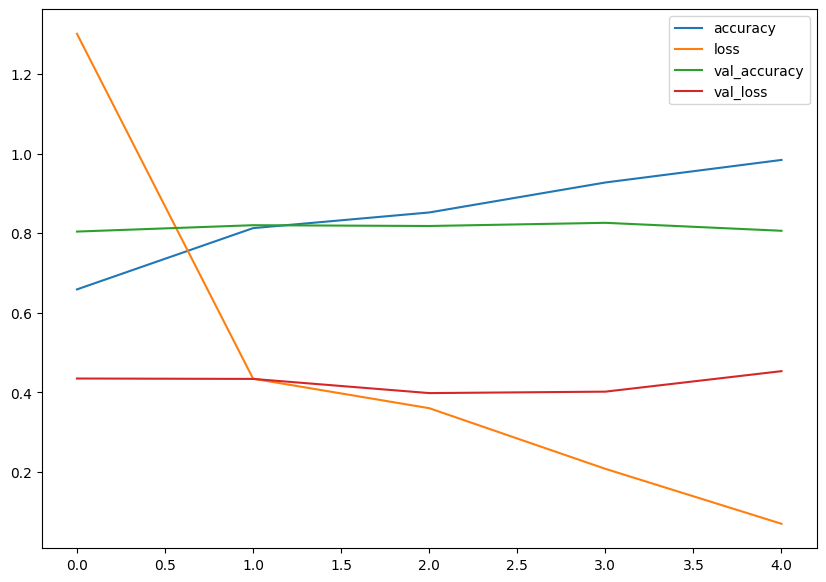

In [30]:
#Lets plot the training curves
import pandas as pd
pd.DataFrame(history_2.history).plot(figsize=(10,7))

In [31]:
#Plot the training and the validation curves separately
def plot_loss_curves(history):
  """
  Returns separat loss curves for training and validation metrics
  """
  loss=history.history["loss"]
  val_loss=history.history["val_loss"]

  accuracy=history.history["accuracy"]
  val_accuracy=history.history["val_accuracy"]

  epochs=range(len(history.history["accuracy"]))#how long did we run

  #Plot the loss curves
  plt.figure()
  plt.plot(epochs,loss,label="training_Loss")
  plt.plot(epochs,val_loss,label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  #Plot the accuracy
  plt.figure()
  plt.plot(epochs,accuracy,label="training_accuracy")
  plt.plot(epochs,val_accuracy,label="val_accuracy")
  plt.title("Accuracy")
  plt.xlabel("epochs")
  plt.legend()


#
When a models validation loss starts increasing .The model is said to be overfitting the training dataset.

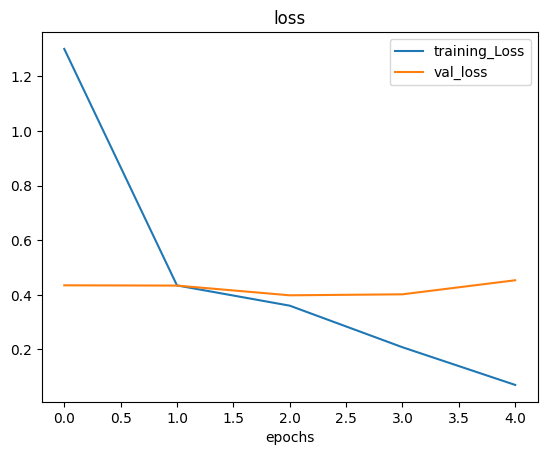

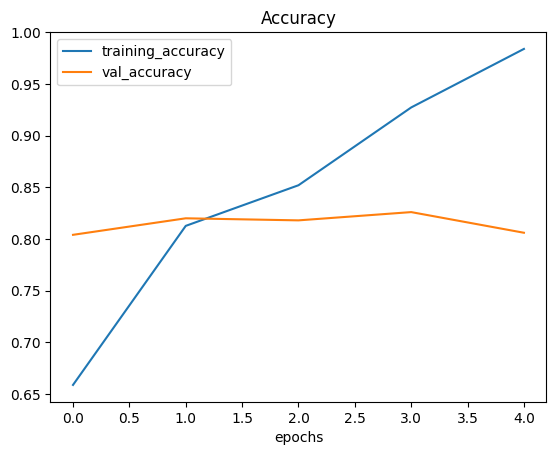

In [32]:
plot_loss_curves(history_2)

##6.Adjust the model params
Reducing overfitting(Fitting a ML model) comes in the following steps
1. Create the baseline model
2. Beat the baseline by trying to overfit a larger model
3. Try to reduce overfitting in the model


How to induce overfitting
1. Increase number of conv2d layers
2. Increase number of hidden units
3. Add another dense layer to the output of our flattened layer

How to reduce overfitting

1. Data normalization/augmentation
2. Add regularization layers(Maxpool2d)
3. Add more data

In [33]:
#Creat a new model(Reducing overfitting using maxpoolig)
model_3=Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
#Compile the model
model_3.compile(
    loss="binary_crossentropy",
    optimizer=Adam(),
    metrics=['accuracy']
)

In [35]:
#Fit the model
history_3=model_3.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data,
                                          ),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 182ms/step - accuracy: 0.5628 - loss: 0.6787 - val_accuracy: 0.7120 - val_loss: 0.5432
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - accuracy: 0.7155 - loss: 0.5617 - val_accuracy: 0.8220 - val_loss: 0.4198
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 99ms/step - accuracy: 0.7885 - loss: 0.4681 - val_accuracy: 0.8700 - val_loss: 0.3521
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 113ms/step - accuracy: 0.8401 - loss: 0.4033 - val_accuracy: 0.8820 - val_loss: 0.3525
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - accuracy: 0.8346 - loss: 0.4010 - val_accuracy: 0.8700 - val_loss: 0.3258


In [36]:
#Let's check the summary
model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 111, 111, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 109, 109, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 54, 54, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 52, 52, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 26, 26, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 24, 24, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 12, 12, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1440)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │         1,441 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,355 (52.17 KB)

 Trainable params: 4,451 (17.39 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,904 (34.79 KB)

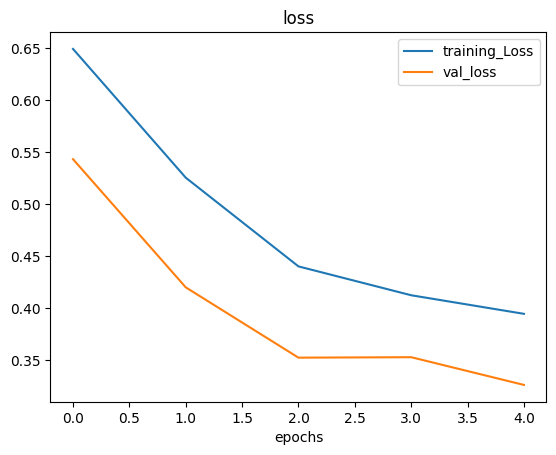

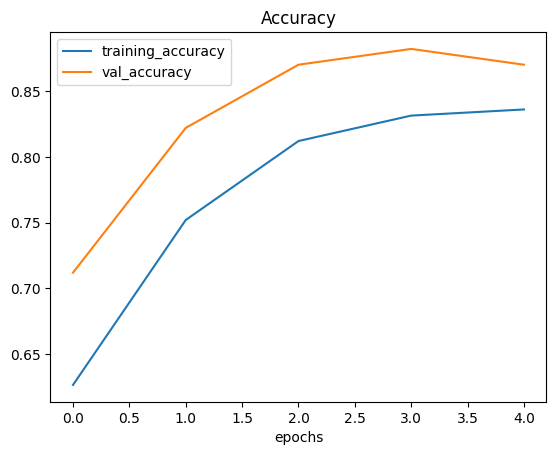

In [37]:
#Plot loss curves of model_3
plot_loss_curves(history=history_3)

###Data Augmentation
Data augmentation is a machine learning technique used to artificially increase the size and diversity of training datasets by creating modified copies of existing data, such as rotating, flipping, or changing the color of images

In [38]:
#Create an ImageDat Generator instance with data augmentation
train_datagen_augmented=ImageDataGenerator(rescale=1./255,
                                           rotation_range=0.2,
                                           shear_range=0.2,
                                           width_shift_range=0.2,
                                           height_shift_range=0.3,
                                           horizontal_flip="True")
#Create image dataGenerator without data augmentaton
train_datagen=ImageDataGenerator(rescale=1/255.)

#Create the test ImageDataGenerator without Data Augmentation
test_datagen=ImageDataGenerator(rescale=1/255.)

In [39]:
#Import data and augment it from training dir
print("Augmented train data")
train_data_augmented=train_datagen_augmented.flow_from_directory(directory=train_dir,
                                                                 target_size=(224,224),
                                                                 batch_size=32,
                                                                 class_mode="binary",
                                                                 shuffle='False')#For demonstration purposes only

#Create non_augmented train_data batches
print("Non Augmented Training Data")
train_data_non_augmented=train_datagen.flow_from_directory(train_dir,
                                                           target_size=(224,224),
                                                           batch_size=32,
                                                           class_mode="binary",
                                                           shuffle="False")
#Create a non_augmented test data
print("Non_augmented test data ")
test_data_nonaugmented=test_datagen.flow_from_directory(test_dir,
                                                        target_size=(224,224),
                                                        batch_size=32,
                                                        class_mode="binary"
                                                       )


Augmented train data
Found 1500 images belonging to 2 classes.
Non Augmented Training Data
Found 1500 images belonging to 2 classes.
Non_augmented test data 
Found 500 images belonging to 2 classes.


In [40]:
#Lets visualize the data
images,labels=next(train_data_non_augmented)
augmented_images,augmented_labels=next(train_data_augmented)

Showing random number:26


(np.float64(-0.5), np.float64(223.5), np.float64(223.5), np.float64(-0.5))

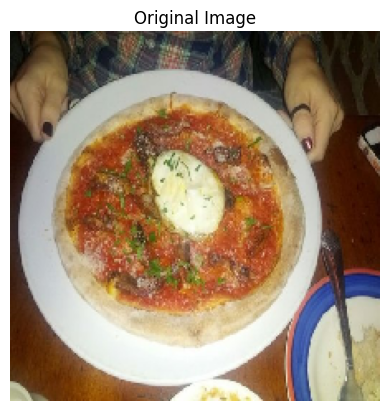

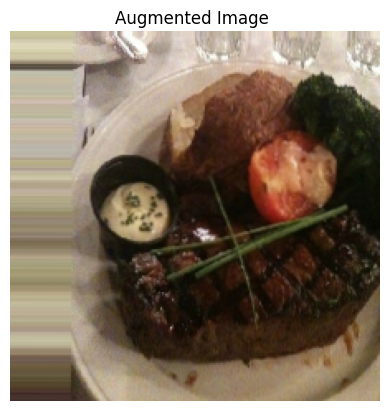

In [41]:
#Show original and augmented data
import random
random_number=random.randint(0,32)#Our batch sizes are 32
print(f"Showing random number:{random_number}")
plt.imshow(images[random_number])
plt.title(f"Original Image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented Image ")
plt.axis(False)


In [42]:
#Training a CNN model on augmented data
model_4=Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

#Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

#Fit the model
history_4=model_4.fit(train_data_augmented,
                      epochs=5,
                      steps_per_epoch=len(train_data_augmented),
                      validation_data=test_data,
                      validation_steps=len(test_data))

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 25s 448ms/step - accuracy: 0.5457 - loss: 0.6802 - val_accuracy: 0.6980 - val_loss: 0.5787
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 432ms/step - accuracy: 0.6698 - loss: 0.5871 - val_accuracy: 0.7960 - val_loss: 0.4139
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 425ms/step - accuracy: 0.7550 - loss: 0.5209 - val_accuracy: 0.8600 - val_loss: 0.3466
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 414ms/step - accuracy: 0.7590 - loss: 0.4912 - val_accuracy: 0.7940 - val_loss: 0.4235
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 432ms/step - accuracy: 0.7774 - loss: 0.4868 - val_accuracy: 0.8620 - val_loss: 0.3028


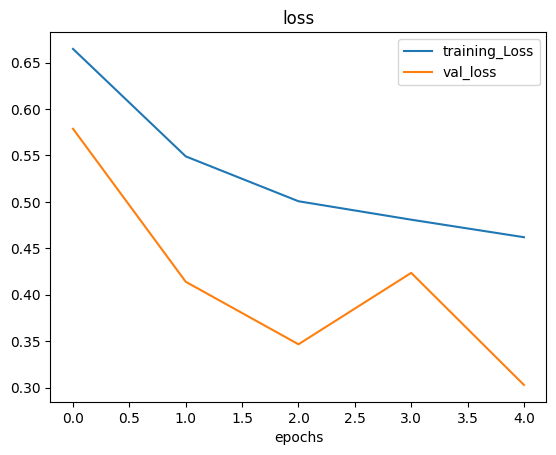

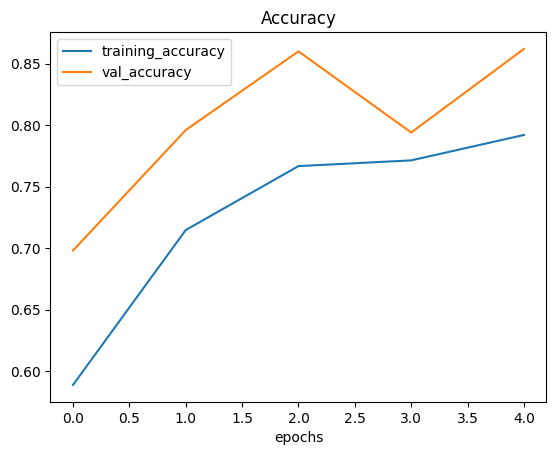

In [43]:
plot_loss_curves(history_4)

##Observation & conclusion
1. **Observations (Loss & Accuracy Curves)**

Training loss decreases steadily

Indicates effective learning and stable optimization.

Validation loss remains low and follows training loss

No divergence → no overfitting.

Validation accuracy is consistently higher than training accuracy

Suggests strong regularization and/or data augmentation.

Minor fluctuation around epoch 3

Temporary and self-correcting.

2. **Explanation**

The CNN is learning meaningful features and generalizing well.

Regularization (e.g., dropout, augmentation) makes training harder than validation.

The model is slightly underfitting, not overfitting, since:

Training accuracy is still below 80%

Both losses are still decreasing

3. **Conclusion**

The CNN demonstrates stable learning, good generalization, and no overfitting.
However, the gap between achievable accuracy and current performance suggests room for improvement through better model capacity, training strategy, and data handling.

4. **Suggestions to Increase Accuracy ✅**
* (A) Train Longer (Most Immediate Fix)

Increase the number of epochs

Use Early Stopping to avoid overfitting

Rationale: Loss is still decreasing → learning is not complete

* (B) Improve Model Architecture

Add more convolutional filters

Increase network depth

Use Batch Normalization after convolutions

Rationale: Allows learning richer feature representations

* (C) Fine-Tune Hyperparameters

Reduce learning rate gradually (LR scheduler)

Try AdamW instead of Adam

Tune batch size (often 16–32 works better than large batches)

Rationale: Better convergence and smoother optimization

* (D) Enhance Data Augmentation (Carefully)

Add:

Random zoom

Slight brightness shifts

Avoid aggressive transformations

Rationale: Improves robustness without harming signal

* (E) Use Transfer Learning (Biggest Accuracy Boost 🚀)

Start from pretrained models (e.g., ResNet, VGG, MobileNet)

Fine-tune top layers

Rationale: Leverages rich visual features learned on large datasets

* (F) Reduce Underfitting

Reduce dropout slightly if too high

Increase model capacity

Rationale: Training accuracy lagging behind validation indicates underfitting

* (G) Improve Data Quality

Remove mislabeled or noisy samples

Balance class distribution

Rationale: Cleaner data directly improves accuracy

In [44]:
#Create anothe model (samea as 5 but with shuffle set to true )

#Createa an image data gen with
train_datagen_augmented=ImageDataGenerator(rescale=1/255.,
                                           rotation_range=0.2,
                                           shear_range=0.2,
                                           width_shift_range=0.2,
                                           height_shift_range=0.2,
                                           horizontal_flip="True"
                                           )

#Create augmented data with shuffle set to true
train_data_augmented=train_datagen_augmented.flow_from_directory(train_dir,
                                                                 target_size=(224,224),
                                                                 batch_size=32,
                                                                 class_mode='binary',
                                                                 shuffle="True")


Found 1500 images belonging to 2 classes.


In [45]:
#Create the model 6

model_6=Sequential([
     Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
     MaxPool2D(pool_size=2),
     Conv2D(10,3,activation="relu"),
     MaxPool2D(),
     Conv2D(10,3,activation="relu"),
     MaxPool2D(),
     Flatten(),
     Dense(1,activation="sigmoid")
 ])

 #Compile the model
model_6.compile(loss="binary_crossentropy",
                 optimizer=Adam(),
                 metrics=["accuracy"])

 #Fit the model
history_6=model_6.fit(train_data_augmented,
                       epochs=5,
                       steps_per_epoch=len(train_data_augmented,
                                           ),
                       validation_data=test_data,
                       validation_steps=len(test_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 24s 463ms/step - accuracy: 0.5695 - loss: 0.6782 - val_accuracy: 0.8220 - val_loss: 0.4384
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 410ms/step - accuracy: 0.7674 - loss: 0.4971 - val_accuracy: 0.7320 - val_loss: 0.5367
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 413ms/step - accuracy: 0.7994 - loss: 0.4659 - val_accuracy: 0.8220 - val_loss: 0.3857
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 434ms/step - accuracy: 0.7723 - loss: 0.4971 - val_accuracy: 0.8500 - val_loss: 0.3653
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 421ms/step - accuracy: 0.7964 - loss: 0.4425 - val_accuracy: 0.8680 - val_loss: 0.3227


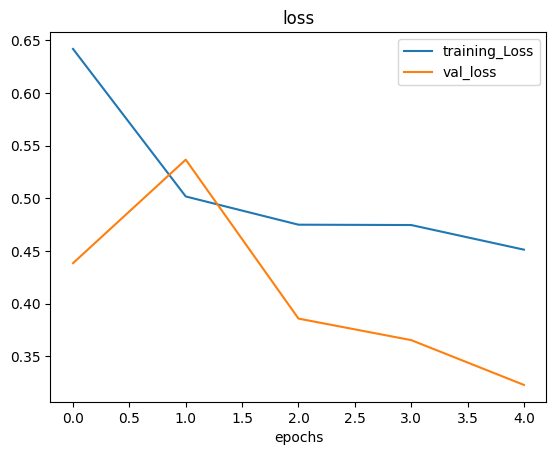

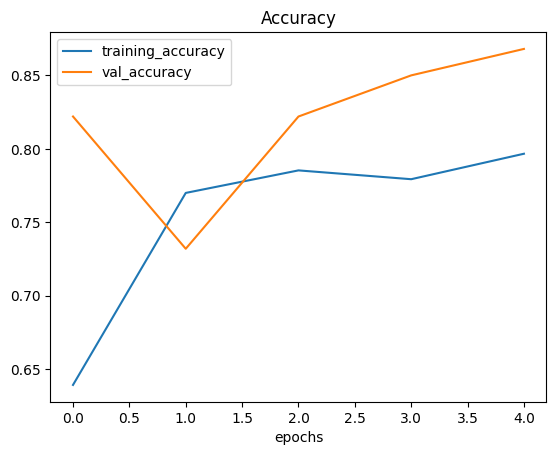

In [46]:
plot_loss_curves(history_6)

##7.Repeat until satisfied
We can repeat the procedures till we get the desired outconme from our model

Ways of improving a model
* Increase the number of layers
* Incrase the number of hidden layers
* Change activation functions
* Change optimization functions
* Change the learning rate
* Fitting more data
* Fitting for longer
* Use transfer learning


--2026-02-02 07:02:59--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.007s  

2026-02-02 07:03:04 (256 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



(np.float64(-0.5), np.float64(3023.5), np.float64(4031.5), np.float64(-0.5))

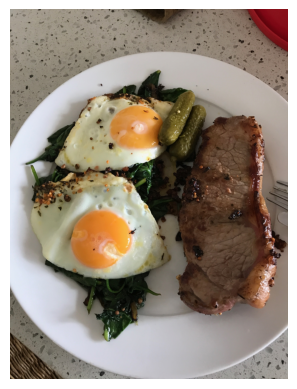

In [49]:
#Making a prediction with our cnn on custom image
#Exclude the blob thingy
#!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-steak.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak=mpimg.imread('03-steak.jpeg')
plt.imshow(steak)
plt.axis(False)

In [50]:
#Visualizing th data (A giant array)
steak

array([[[162, 158, 149],
        [163, 159, 150],
        [166, 162, 153],
        ...,
        [136,  17,  23],
        [140,  21,  27],
        [140,  21,  27]],

       [[164, 160, 151],
        [164, 160, 151],
        [164, 160, 151],
        ...,
        [133,  14,  20],
        [134,  15,  21],
        [137,  18,  24]],

       [[166, 162, 153],
        [165, 161, 152],
        [163, 159, 150],
        ...,
        [136,  17,  23],
        [134,  15,  21],
        [136,  17,  23]],

       ...,

       [[154, 132, 111],
        [142, 121, 100],
        [101,  80,  59],
        ...,
        [164, 155, 148],
        [152, 141, 135],
        [140, 129, 123]],

       [[141, 119,  96],
        [138, 118,  94],
        [106,  85,  64],
        ...,
        [158, 147, 141],
        [142, 131, 125],
        [138, 127, 121]],

       [[148, 126, 102],
        [148, 128, 103],
        [114,  93,  72],
        ...,
        [153, 142, 136],
        [138, 127, 121],
        [143, 132, 126]]

In [51]:
#Check the shape
steak.shape

(4032, 3024, 3)

#Helper functions to help preprocess custom data

To make accurate predictions possible using custom data its important to have the shape of the custom image tyo be the same shape as those used to train and test data

In [70]:
#Helper function that takes in custom image and reshapes it to be able to be used by our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshapes it
  to (img_shape, img_shape, colour_channels).
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img,channels=3)#Added to force png files that have 4 channels to stick to 3
  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img


In [53]:
# Load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak


<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [55]:
pred = model_6.predict(tf.expand_dims(steak, axis=0))
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step


array([[0.89850825]], dtype=float32)

Looks like our custom image is being put through our model, however, it currently outputs a prediction probability, wouldn't it be nice if we could visualize the image as well as the model's prediction?

In [56]:
# Remind ourselves of our class names/What classes do we have
class_names

array(['pizza', 'steak'], dtype='<U5')

In [57]:
# We can index the predicted class by rounding the prediction probability and indexing it on the class names
pred_class = class_names[int(tf.round(pred))]
pred_class

np.str_('steak')

In [58]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model
  and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


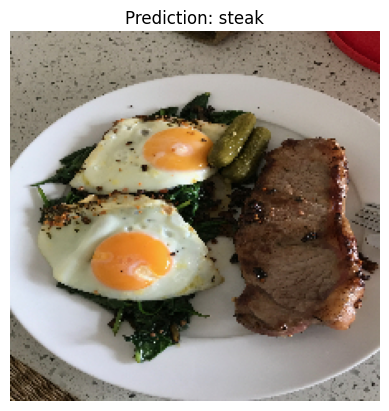

In [59]:
# Test our model on a custom image
pred_and_plot(model_6, "03-steak.jpeg")

--2026-02-02 07:23:31--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.1’

03-pizza-dad.jpeg.1 100%[===================>]   2.74M  --.-KB/s    in 0.01s   

2026-02-02 07:23:31 (254 MB/s) - ‘03-pizza-dad.jpeg.1’ saved [2874848/2874848]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


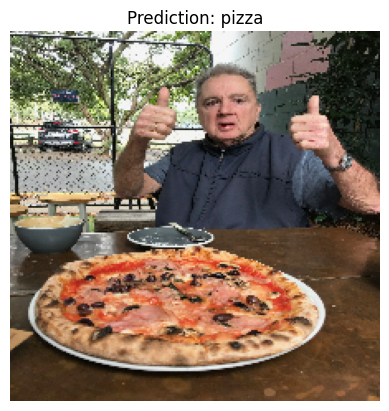

In [61]:
# Download another test custom image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_6, "03-pizza-dad.jpeg")

(np.float64(-0.5), np.float64(691.5), np.float64(542.5), np.float64(-0.5))

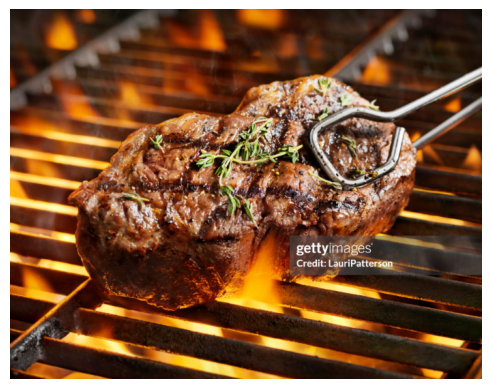

In [81]:
#Plot the custom data
steak_1=mpimg.imread("03-steak.png")
plt.imshow(steak_1)
plt.axis(False)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


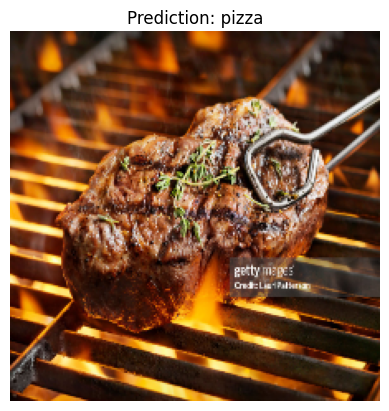

In [82]:
#Make a prediction on custom data (Scrrenshot from Istock photos)
#screenshot='03-steak.png'
pred_and_plot(model_6,"03-steak.png")

Wow wow wow ...what have we here?Did changing the image format affect preds?Did adding that channel=3 inside image.decode_image cause this?what caused this poor prediction?

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


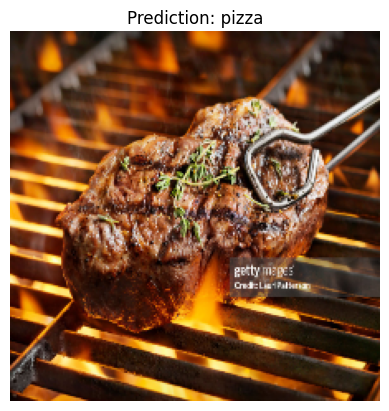

In [77]:
#Did changing the file format affect preds
pred_and_plot(model_6, "03-pizza-dad.jpeg")

#pred_and_plot(model_6,"03-steak.png")

Well not quite ,it still does well

In [75]:
#Lets see what was lodaed and preped here here
steak_1=load_and_prep_image("03-steak.png")
steak_1

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[1.23107135e-01, 9.56561491e-02, 5.88739403e-02],
        [1.16366625e-01, 8.06985274e-02, 5.55059537e-02],
        [1.15894563e-01, 7.84313753e-02, 5.32387979e-02],
        ...,
        [7.76437670e-02, 5.42785190e-02, 4.03448902e-02],
        [6.96732700e-02, 5.49019612e-02, 3.67974192e-02],
        [6.62574619e-02, 5.22343516e-02, 3.37557085e-02]],

       [[1.26199231e-01, 1.02088183e-01, 5.66876717e-02],
        [1.35199323e-01, 9.03566107e-02, 5.88235296e-02],
        [1.24200076e-01, 8.47109929e-02, 5.82895651e-02],
        ...,
        [7.06913993e-02, 5.20322621e-02, 3.60504575e-02],
        [6.02651834e-02, 4.85004745e-02, 2.79677790e-02],
        [5.88235296e-02, 4.70588244e-02, 2.63830535e-02]],

       [[1.29488751e-01, 1.01883799e-01, 7.02380985e-02],
        [1.29180819e-01, 1.01729833e-01, 6.10206574e-02],
        [1.27196893e-01, 9.97459218e-02, 6.05302267e-02],
        ...,
        [6.10385165e-02, 4.83982

In [78]:
#Check the first 2 arrays from the png & jpg file formats
steak_1[:2] ,steak[:2]


(<tf.Tensor: shape=(2, 224, 3), dtype=float32, numpy=
 array([[[0.12310714, 0.09565615, 0.05887394],
         [0.11636662, 0.08069853, 0.05550595],
         [0.11589456, 0.07843138, 0.0532388 ],
         ...,
         [0.07764377, 0.05427852, 0.04034489],
         [0.06967327, 0.05490196, 0.03679742],
         [0.06625746, 0.05223435, 0.03375571]],
 
        [[0.12619923, 0.10208818, 0.05668767],
         [0.13519932, 0.09035661, 0.05882353],
         [0.12420008, 0.08471099, 0.05828957],
         ...,
         [0.0706914 , 0.05203226, 0.03605046],
         [0.06026518, 0.04850047, 0.02796778],
         [0.05882353, 0.04705882, 0.02638305]]], dtype=float32)>,
 <tf.Tensor: shape=(2, 224, 3), dtype=float32, numpy=
 array([[[0.6377451 , 0.6220588 , 0.57892156],
         [0.6504902 , 0.63186276, 0.5897059 ],
         [0.63186276, 0.60833335, 0.5612745 ],
         ...,
         [0.52156866, 0.05098039, 0.09019608],
         [0.49509802, 0.04215686, 0.07058824],
         [0.52843136, 0.07745

In [79]:
#Chek the shape of png and jpg formats
steak_1.shape,steak.shape

(TensorShape([224, 224, 3]), TensorShape([224, 224, 3]))

What could have caused this poor prediction then?
1. Image quality?
2. Overfitting ?
3. Small CNN ?